In [ ]:
# https://www.kaggle.com/wordsforthewise/lending-club   dataset named accepted_2007_to_2018Q4.csv.gz only

# Data preprocessing and EDA

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Aidyn\Python\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('accepted_2007_to_2018Q4.csv')
df

C:\Aidyn\Python\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape # original data has 2260701 rows and 151 columns

(2260701, 151)

In [5]:
df['loan_status'].unique() # Values that the target variable takes

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [6]:
df['loan_status'].value_counts(dropna = False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

Text(0.5, 1.0, '0/1 distribution')

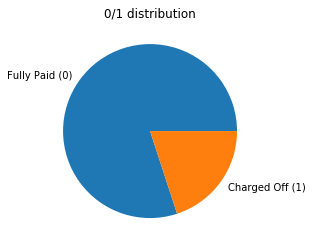

In [7]:
paid = df[df['loan_status'] == 'Fully Paid']  # keep only Fully Paid and Charged Off status for a binary classification
chargedoff = df[df['loan_status'] == 'Charged Off']
plt.pie(np.array([paid.shape[0],chargedoff.shape[0]]), labels = ['Fully Paid (0)', 'Charged Off (1)'])
plt.title('0/1 distribution')          # See the prior distribution of the two classes. We can see that the data is unbalanced.

In [8]:
df['Charged Off'] = (df['loan_status'] == 'Charged Off').astype(int) # convert into 0/1 problem
df = df.drop('loan_status', axis = 1) # drop the original column
dropedna = df.dropna(axis = 1, thresh = int(df.shape[0] * 0.8)) #df.shape[0] * 0.8 keep columns with 80% non-NA values.

In [9]:
dropedna.shape  

(2260701, 93)

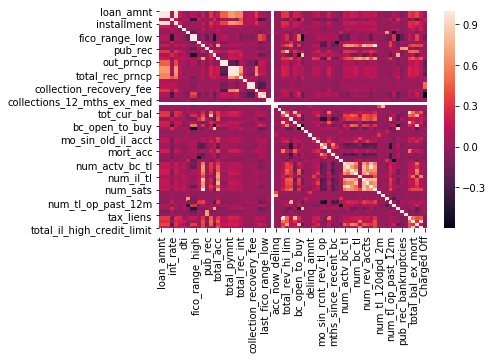

In [10]:
corr = dropedna.corr()
sns.heatmap(corr) # correlation heatmap

In [9]:
keep_list = ['Charged Off','funded_amnt','addr_state', 'annual_inc', \
'application_type','dti', 'earliest_cr_line', 'emp_length',\
'emp_title', 'fico_range_high',\
'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', \
'installment', 'int_rate', 'loan_amnt', \
'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', \
'purpose', 'revol_bal', 'revol_util', \
'sub_grade', 'term', 'title', 'total_acc',\
'verification_status', 'zip_code','last_pymnt_amnt',\
'num_actv_rev_tl', 'mo_sin_rcnt_rev_tl_op',\
'mo_sin_old_rev_tl_op',"bc_util","bc_open_to_buy",\
"avg_cur_bal","acc_open_past_24mths" ]
# Columns to keep based on intuitiveness, rather broad because other tests will be conducted as well.

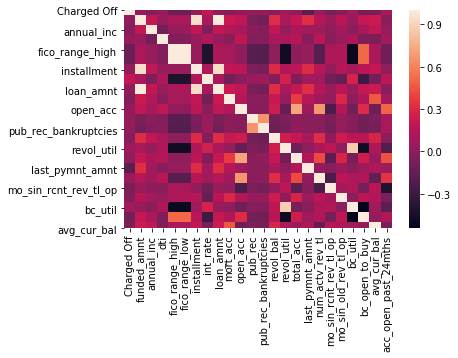

In [10]:
df2 = dropedna[keep_list]
sns.heatmap(df2.corr())

In [11]:
todrop = df2.corr()['Charged Off'].abs().sort_values(ascending = True)[0:2].index # find the 2 least correlated features.
todrop

Index(['total_acc', 'open_acc'], dtype='object')

In [12]:
df2 = df2.drop(todrop, axis = 1) # drop the 2 least correlated features.

In [13]:
categorical = np.array(df2.select_dtypes(include = 'object').columns)  # find categorical data
categorical

array(['addr_state', 'application_type', 'earliest_cr_line', 'emp_length',
       'emp_title', 'grade', 'home_ownership', 'id',
       'initial_list_status', 'purpose', 'sub_grade', 'term', 'title',
       'verification_status', 'zip_code'], dtype=object)

In [16]:
df2.isnull().sum() # see the null valued columns

Charged Off                   0
funded_amnt                  33
addr_state                   33
annual_inc                   37
application_type             33
dti                        1744
earliest_cr_line             62
emp_length               146940
emp_title                167002
fico_range_high              33
fico_range_low               33
grade                        33
home_ownership               33
id                            0
initial_list_status          33
installment                  33
int_rate                     33
loan_amnt                    33
mort_acc                  50063
pub_rec                      62
pub_rec_bankruptcies       1398
purpose                      33
revol_bal                    33
revol_util                 1835
sub_grade                    33
term                         33
title                     23358
verification_status          33
zip_code                     34
last_pymnt_amnt              33
num_actv_rev_tl           70309
mo_sin_r

In [15]:
df2[categorical].describe()

,addr_state,application_type,earliest_cr_line,emp_length,emp_title,grade,home_ownership,id,initial_list_status,purpose,sub_grade,term,title,verification_status,zip_code
count,2260668,2260668,2260639,2113761,2093699,2260668,2260668,2260701,2260668,2260668,2260668,2260668,2237343,2260668,2260667
unique,51,2,754,11,512694,7,6,2260701,2,14,35,2,63155,3,956
top,CA,Individual,Sep-2004,10+ years,Teacher,B,MORTGAGE,75497472,w,debt_consolidation,C1,36 months,Debt consolidation,Source Verified,112xx
freq,314533,2139958,15400,748005,38824,663557,1111450,1,1535467,1277877,145903,1609754,1153293,886231,23908


In [ ]:
# categorical_drop = ['addr_state', 'application_type', 'earliest_cr_line',   # original
#        'emp_title', 'home_ownership', 'id',
#        'initial_list_status', 'purpose', 'title',
#        'verification_status', 'zip_code']

In [14]:
categorical_drop = ['addr_state', 'application_type', 'earliest_cr_line',
       'emp_title',  'id',
       'initial_list_status',  'title',
        'zip_code']
# zip code and addr_state have too many categorical values and is not relevant
# emp_title and title can be represente by salary.
# id is irrelevant

In [15]:
df2 = df2.drop(categorical_drop, axis = 1)

In [16]:
df2['term'] = df2['term'].str[1:3] # e.g. 36 months ---> 36
df2['term'] = df2['term'].fillna(df2['term'].mode()[0]) # fill na values with the mode.
df2['emp_length'] = df['emp_length'].str[:2] # e.g. 10 years ---> 10

In [17]:
df2['emp_length'].unique()      # Unique values for the employment length feature

array(['10', '3 ', '4 ', '6 ', '1 ', '7 ', '8 ', '5 ', '2 ', '9 ', '< ',
       nan], dtype=object)

In [18]:
df2['term'] = df2['term'].astype('int32')        # change dtype from object to int32
df2['emp_length'] = df2['emp_length'].replace({'< ': 0})       # replace string < with 0
df2['emp_length'] = df2['emp_length'].astype('float64')  # change dtype from object to float
df2['emp_length'] = df2['emp_length'].fillna(df2['emp_length'].notnull().mean()) # fill null values with mean

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Charged Off            int32  
 1   funded_amnt            float64
 2   annual_inc             float64
 3   dti                    float64
 4   emp_length             float64
 5   fico_range_high        float64
 6   fico_range_low         float64
 7   grade                  object 
 8   home_ownership         object 
 9   installment            float64
 10  int_rate               float64
 11  loan_amnt              float64
 12  mort_acc               float64
 13  pub_rec                float64
 14  pub_rec_bankruptcies   float64
 15  purpose                object 
 16  revol_bal              float64
 17  revol_util             float64
 18  sub_grade              object 
 19  term                   int32  
 20  verification_status    object 
 21  last_pymnt_amnt        float64
 22  num_actv_rev_tl   

In [22]:
df2['grade'].value_counts(normalize = True)

B    0.293523
C    0.287549
A    0.191548
D    0.143508
E    0.060000
F    0.018490
G    0.005382
Name: grade, dtype: float64

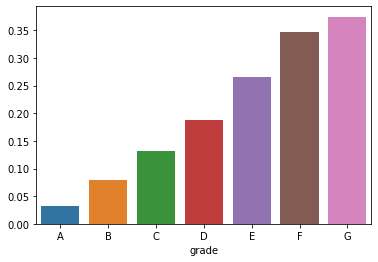

In [23]:
# Dependence between the grade of the loan and the amount of charged off loans.

charge_off_rates = df2.groupby('grade')['Charged Off'].value_counts(normalize=True).loc[:,1]
sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values)

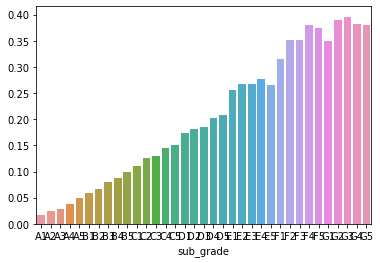

In [24]:
# Dependence between the sub grade of the loan and the amount of charged off loans.
charge_off_rates = df2.groupby('sub_grade')['Charged Off'].value_counts(normalize=True).loc[:,1]
sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values)

In [ ]:
# We can see that the grade and sub_grade have the same effect and correlation with the target, hence we an drop one of them


In [19]:
df2 = df2.drop('grade', axis = 1) # drop grade because, sub_grade containts more groups and can add more information.

In [20]:
df2['annual_inc'] = df2['annual_inc'].fillna(df2['annual_inc'].median())   # fill null values with median because range
                                                                           #of values is too high and there are many outliers.
df2['funded_amnt'] = df2['funded_amnt'].fillna(df2['funded_amnt'].mean())  # fill null values with mean
df2['dti'] = df2['dti'].fillna(df2['dti'].mean()) #A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
df2['installment'] = df2['installment'].fillna(df2['installment'].mean())   # fill null values with mean



In [21]:
df2[['fico_range_high', 'fico_range_low']].corr()  # correlation matrix

,fico_range_high,fico_range_low
fico_range_high,1.0,1.0
fico_range_low,1.0,1.0


In [22]:
df2 = df2.drop('fico_range_high', axis = 1)  # drop one of them since correlation is 1

In [30]:
df2['home_ownership'].value_counts()      # see the how many values of each category among home_ownership variable there are.

MORTGAGE    1111450
RENT         894929
OWN          253057
ANY             996
OTHER           182
NONE             54
Name: home_ownership, dtype: int64

In [32]:
df2['verification_status'].value_counts() # see the how many values of each category among verification_status variable there are.

Source Verified    886231
Not Verified       744806
Verified           629631
Name: verification_status, dtype: int64

In [34]:
df2['purpose'].value_counts() # see the how many values of each category among purpose variable there are.

debt_consolidation    1277877
credit_card            516971
home_improvement       150457
other                  139440
major_purchase          50445
medical                 27488
small_business          24689
car                     24013
vacation                15525
moving                  15403
house                   14136
wedding                  2355
renewable_energy         1445
educational               424
Name: purpose, dtype: int64

In [37]:
df2[['sub_grade','home_ownership','verification_status','purpose']].mode() # find the mode for each variable

,sub_grade,home_ownership,verification_status,purpose
0,C1,MORTGAGE,Source Verified,debt_consolidation


In [38]:
df2['home_ownership'].mode()[0]  # just an example

'MORTGAGE'

In [23]:
categorical = df2[['sub_grade','home_ownership','verification_status','purpose']]
df2 = df2.drop(categorical, axis = 1)  # drop categorical variables and fill null values with mean values
df2 = df2.fillna(df2.mean())
df2[['sub_grade','home_ownership','verification_status','purpose']] = categorical # return the categorical values
df2['sub_grade'] = df2['sub_grade'].fillna(df2['sub_grade'].mode()[0])  # fill null values for categorical variables with mode
df2['home_ownership'] = df2['home_ownership'].fillna(df2['home_ownership'].mode()[0])
df2['verification_status'] = df2['verification_status'].fillna(df2['verification_status'].mode()[0])
df2['purpose'] = df2['purpose'].fillna(df2['purpose'].mode()[0])
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Charged Off
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0


In [30]:
df2.isna().sum()  # finally, there are no null values

Charged Off              0
funded_amnt              0
annual_inc               0
dti                      0
emp_length               0
fico_range_low           0
installment              0
int_rate                 0
loan_amnt                0
mort_acc                 0
pub_rec                  0
pub_rec_bankruptcies     0
revol_bal                0
revol_util               0
term                     0
last_pymnt_amnt          0
num_actv_rev_tl          0
mo_sin_rcnt_rev_tl_op    0
mo_sin_old_rev_tl_op     0
bc_util                  0
bc_open_to_buy           0
avg_cur_bal              0
acc_open_past_24mths     0
sub_grade                0
home_ownership           0
verification_status      0
purpose                  0
dtype: int64

In [31]:
df2.info() # however ther are object type variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 27 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Charged Off            int32  
 1   funded_amnt            float64
 2   annual_inc             float64
 3   dti                    float64
 4   emp_length             float64
 5   fico_range_low         float64
 6   installment            float64
 7   int_rate               float64
 8   loan_amnt              float64
 9   mort_acc               float64
 10  pub_rec                float64
 11  pub_rec_bankruptcies   float64
 12  revol_bal              float64
 13  revol_util             float64
 14  term                   int32  
 15  last_pymnt_amnt        float64
 16  num_actv_rev_tl        float64
 17  mo_sin_rcnt_rev_tl_op  float64
 18  mo_sin_old_rev_tl_op   float64
 19  bc_util                float64
 20  bc_open_to_buy         float64
 21  avg_cur_bal            float64
 22  acc_open_past_24mt

In [24]:
categorical = df2[['sub_grade','home_ownership','verification_status','purpose']]
categorical

,sub_grade,home_ownership,verification_status,purpose
0,C4,MORTGAGE,Not Verified,debt_consolidation
1,C1,MORTGAGE,Not Verified,small_business
2,B4,MORTGAGE,Not Verified,home_improvement
3,C5,MORTGAGE,Source Verified,debt_consolidation
4,F1,MORTGAGE,Source Verified,major_purchase
...,...,...,...,...
2260696,B3,MORTGAGE,Verified,debt_consolidation
2260697,C4,RENT,Not Verified,debt_consolidation
2260698,C4,MORTGAGE,Verified,debt_consolidation
2260699,C1,MORTGAGE,Source Verified,debt_consolidation


In [25]:
categorical = df2[['sub_grade','home_ownership','verification_status','purpose']]

In [26]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()  # label encoder assigns integer values from 0 to k-1 classes for each category
encoder.fit(df2['sub_grade'])
encoder.classes_  # original categories from sub_grade column

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [27]:
df2['sub_grade'] = encoder.transform(df2['sub_grade'])
df2['sub_grade']  # transform object type to int32 type

0          13
1          10
2           8
3          14
4          25
           ..
2260696     7
2260697    13
2260698    13
2260699    10
2260700    10
Name: sub_grade, Length: 2260701, dtype: int32

In [28]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()  # do the same with home_ownership
encoder.fit(df2['home_ownership'])
df2['home_ownership'] = encoder.transform(df2['home_ownership'])
df2['home_ownership']

0          1
1          1
2          1
3          1
4          1
          ..
2260696    1
2260697    5
2260698    1
2260699    1
2260700    1
Name: home_ownership, Length: 2260701, dtype: int32

In [29]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoder.fit(df2['verification_status']) # do the same with verification_status
df2['verification_status'] = encoder.transform(df2['verification_status'])
df2['verification_status']

0          0
1          0
2          0
3          1
4          1
          ..
2260696    2
2260697    0
2260698    2
2260699    1
2260700    1
Name: verification_status, Length: 2260701, dtype: int32

In [30]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoder.fit(df2['purpose'])   # do the same with purpose
df2['purpose'] = encoder.transform(df2['purpose'])
df2['purpose']

0           2
1          11
2           4
3           2
4           6
           ..
2260696     2
2260697     2
2260698     2
2260699     2
2260700     2
Name: purpose, Length: 2260701, dtype: int32

In [54]:
df2.isnull().sum() # no null values

Charged Off              0
funded_amnt              0
annual_inc               0
dti                      0
emp_length               0
fico_range_low           0
installment              0
int_rate                 0
loan_amnt                0
mort_acc                 0
pub_rec                  0
pub_rec_bankruptcies     0
revol_bal                0
revol_util               0
term                     0
last_pymnt_amnt          0
num_actv_rev_tl          0
mo_sin_rcnt_rev_tl_op    0
mo_sin_old_rev_tl_op     0
bc_util                  0
bc_open_to_buy           0
avg_cur_bal              0
acc_open_past_24mths     0
sub_grade                0
home_ownership           0
verification_status      0
purpose                  0
dtype: int64

In [56]:
df2.info() # no object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 27 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Charged Off            int32  
 1   funded_amnt            float64
 2   annual_inc             float64
 3   dti                    float64
 4   emp_length             float64
 5   fico_range_low         float64
 6   installment            float64
 7   int_rate               float64
 8   loan_amnt              float64
 9   mort_acc               float64
 10  pub_rec                float64
 11  pub_rec_bankruptcies   float64
 12  revol_bal              float64
 13  revol_util             float64
 14  term                   int32  
 15  last_pymnt_amnt        float64
 16  num_actv_rev_tl        float64
 17  mo_sin_rcnt_rev_tl_op  float64
 18  mo_sin_old_rev_tl_op   float64
 19  bc_util                float64
 20  bc_open_to_buy         float64
 21  avg_cur_bal            float64
 22  acc_open_past_24mt

In [57]:
df2['annual_inc'].describe()  # maximum and minimum in the range of hundreds of millions.

count    2.260701e+06
mean     7.799222e+04
std      1.126953e+05
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.300000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

In [31]:
df2['annual_inc'] = np.log(df2['annual_inc']+1)  # apply the log function but add 1 because log(0) is undefined

In [40]:
df2['Charged Off'].value_counts()

0    1992142
1     268559
Name: Charged Off, dtype: int64

In [32]:
charged = df2[df2['Charged Off'] == 0].sample(n = df2['Charged Off'].value_counts()[1], random_state = 66) 
#randomly sample charged off loans such that the amount of data for charged of and not charged off (paid) is equal

In [33]:
paid = df2[df2['Charged Off'] == 1]

In [34]:
# Final dataframe with 537118 rows × 27 columns. Significantly less than the orignial data.
data = pd.concat([charged, paid]).reset_index(drop = True)
data

,Charged Off,funded_amnt,annual_inc,dti,emp_length,fico_range_low,installment,int_rate,loan_amnt,mort_acc,...,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,sub_grade,home_ownership,verification_status,purpose
0,0,20000.0,10.915107,9.80,3.000000,680.0,613.94,27.27,20000.0,2.0,...,36.0,54.0,101.5,0.0,30826.0,1.0,24,4,2,2
1,0,10000.0,10.491302,16.63,3.000000,675.0,326.97,10.91,10000.0,0.0,...,7.0,44.0,47.8,7621.0,2642.0,6.0,8,4,1,2
2,0,20000.0,11.302217,17.87,10.000000,700.0,684.43,14.09,20000.0,3.0,...,6.0,279.0,53.6,18216.0,13346.0,2.0,9,1,2,2
3,0,9000.0,10.596660,17.40,0.935002,750.0,288.05,9.44,9000.0,0.0,...,19.0,203.0,79.7,1504.0,1068.0,4.0,5,5,0,2
4,0,17500.0,11.552156,15.87,0.000000,660.0,633.20,18.06,17500.0,3.0,...,10.0,376.0,96.2,656.0,19796.0,7.0,16,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537113,1,32000.0,11.736077,29.89,10.000000,670.0,744.42,13.99,32000.0,7.0,...,3.0,251.0,43.6,53336.0,29071.0,6.0,12,1,1,2
537114,1,11200.0,11.362114,4.80,5.000000,665.0,257.66,13.49,11200.0,0.0,...,1.0,70.0,57.7,6720.0,1797.0,4.0,11,5,1,2
537115,1,36400.0,11.461643,21.50,5.000000,720.0,856.24,14.49,36400.0,6.0,...,5.0,355.0,91.5,3676.0,43772.0,3.0,13,5,2,1
537116,1,32000.0,11.964007,10.34,3.000000,735.0,752.74,14.49,32000.0,3.0,...,4.0,63.0,10.6,14118.0,29193.0,10.0,13,1,1,4


# Model Selection

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [89]:
y = data['Charged Off']
X = data.loc[:, data.columns != 'Charged Off']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [75]:
y_train.value_counts()

0    214892
1    214802
Name: Charged Off, dtype: int64

In [76]:
y_test.value_counts()

1    53757
0    53667
Name: Charged Off, dtype: int64

## No scaling

First try to take naive approach with some parameter guess or default parameters and not scaled data.

### Logistic Regression

In [ ]:
logistic = LogisticRegression(solver = 'saga', max_iter = 5000).fit(X_train, y_train)  # saga solver is used because large dataset.
logistic_pred_prob = logistic.predict_proba(X_test)
logistic_pred = logistic.predict(X_test)
print('ROC_AUC: ', roc_auc_score(y_test.values.reshape(-1,1), logistic_pred_prob[:,1]))
print('Accuracy: ', accuracy_score(y_test, logistic_pred) )
print('Precision: ', precision_score(y_test, logistic_pred) )
print('Recall: ', recall_score(y_test, logistic_pred) )
print('F1 Score: ', f1_score(y_test, logistic_pred) )
pd.DataFrame(confusion_matrix(y_test, logistic_pred), columns = ['Fully Paid (pred)', 'Charged Off (pred)'], index = ['Fully Paid (true)', 'Charged Off (true)'])

### Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
lda_pred = lda.predict(X_test)
lda_pred_prob = lda.predict_proba(X_test)
print('ROC_AUC: ', roc_auc_score(y_test.values.reshape(-1,1), lda_pred_prob[:,1]))
print('Accuracy: ', accuracy_score(y_test, lda_pred) )  # lda.score(X_test_scaled, y_test)
print('Precision: ', precision_score(y_test, lda_pred) )
print('Recall: ', recall_score(y_test, lda_pred) )
print('F1 Score: ', f1_score(y_test, lda_pred) )
pd.DataFrame(confusion_matrix(y_test, lda_pred), columns = ['Fully Paid (pred)', 'Charged Off (pred)'], index = ['Fully Paid (true)', 'Charged Off (true)'])

### Quadratic Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
qda_pred = qda.predict(X_test)
qda_pred_prob = qda.predict_proba(X_test)
print('ROC_AUC: ', roc_auc_score(y_test.values.reshape(-1,1), qda_pred_prob[:,1]))
print('Accuracy: ', accuracy_score(y_test, qda_pred) )  # lda.score(X_test_scaled, y_test)
print('Precision: ', precision_score(y_test, qda_pred) )
print('Recall: ', recall_score(y_test, qda_pred) )
print('F1 Score: ', f1_score(y_test, qda_pred) )
pd.DataFrame(confusion_matrix(y_test, qda_pred), columns = ['Fully Paid (pred)', 'Charged Off (pred)'], index = ['Fully Paid (true)', 'Charged Off (true)'])

### Support Vector Machine

In [ ]:
# from sklearn.svm import LinearSVC
# C = [0.001, 0.01, 0.1, 1, 10, 100, 100]
# for c in C:
#     svm = LinearSVC(C = c).fit(X_train, y_train)
#     svm_pred = svm.predict(X_test)
#     #svm_pred_prob = svm.predict_proba(X_test)
#     print('For C =  ', c)
#     #print('ROC_AUC: ', roc_auc_score(y_test.values.reshape(-1,1), svm_pred_prob[:,1]))
#     print('Accuracy: ', accuracy_score(y_test, svm_pred) )  # lda.score(X_test_scaled, y_test)
#     print('Precision: ', precision_score(y_test, svm_pred) )
#     print('Recall: ', recall_score(y_test, svm_pred) )
#     print('F1 Score: ', f1_score(y_test, svm_pred) )
#     print('\n')
#     pd.DataFrame(confusion_matrix(y_test, svm_pred), columns = ['Fully Paid (pred)', 'Charged Off (pred)'], index = ['Fully Paid (true)', 'Charged Off (true)'])

Did not converge, most probably data is not linearly separable. 

## With Scaling

In [77]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [71]:
logistic = LogisticRegression(solver = 'saga', max_iter = 5000).fit(X_train_scaled, y_train)
logistic_pred_prob = logistic.predict_proba(X_test_scaled)
logistic_pred = logistic.predict(X_test_scaled)
print('ROC_AUC: ', roc_auc_score(y_test.values.reshape(-1,1), logistic_pred_prob[:,1]))
print('Accuracy: ', accuracy_score(y_test, logistic_pred) )
print('Precision: ', precision_score(y_test, logistic_pred) )
print('Recall: ', recall_score(y_test, logistic_pred) )
print('F1 Score: ', f1_score(y_test, logistic_pred) )
pd.DataFrame(confusion_matrix(y_test, logistic_pred), columns = ['Fully Paid (pred)', 'Charged Off (pred)'], index = ['Fully Paid (true)', 'Charged Off (true)'])

ROC_AUC:  0.8389585268636944
Accuracy:  0.7512287756925826
Precision:  0.721201211030194
Recall:  0.8197816098368584
F1 Score:  0.7673381971409169


,Fully Paid (pred),Charged Off (pred)
Fully Paid (true),36631,17036
Charged Off (true),9688,44069


### Linear Discriminant Analysis

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis().fit(X_train_scaled, y_train)
lda_pred = lda.predict(X_test_scaled)
lda_pred_prob = lda.predict_proba(X_test_scaled)
print('ROC_AUC: ', roc_auc_score(y_test.values.reshape(-1,1), lda_pred_prob[:,1]))
print('Accuracy: ', accuracy_score(y_test, lda_pred) )  # lda.score(X_test_scaled, y_test)
print('Precision: ', precision_score(y_test, lda_pred) )
print('Recall: ', recall_score(y_test, lda_pred) )
print('F1 Score: ', f1_score(y_test, lda_pred) )
pd.DataFrame(confusion_matrix(y_test, lda_pred), columns = ['Fully Paid (pred)', 'Charged Off (pred)'], index = ['Fully Paid (true)', 'Charged Off (true)'])

ROC_AUC:  0.8119233518207568
Accuracy:  0.7303675156389634
Precision:  0.7116803278688525
Recall:  0.7752664769239355
F1 Score:  0.7421138385106439


,Fully Paid (pred),Charged Off (pred)
Fully Paid (true),36783,16884
Charged Off (true),12081,41676


### Quadratic Discriminant Analysis

In [73]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis().fit(X_train_scaled, y_train)
qda_pred = qda.predict(X_test_scaled)
qda_pred_prob = qda.predict_proba(X_test_scaled)
print('ROC_AUC: ', roc_auc_score(y_test.values.reshape(-1,1), qda_pred_prob[:,1]))
print('Accuracy: ', accuracy_score(y_test, qda_pred) )  # lda.score(X_test_scaled, y_test)
print('Precision: ', precision_score(y_test, qda_pred) )
print('Recall: ', recall_score(y_test, qda_pred) )
print('F1 Score: ', f1_score(y_test, qda_pred) )
pd.DataFrame(confusion_matrix(y_test, qda_pred), columns = ['Fully Paid (pred)', 'Charged Off (pred)'], index = ['Fully Paid (true)', 'Charged Off (true)'])

ROC_AUC:  0.8115713162487177
Accuracy:  0.7066670390229371
Precision:  0.6419329318089015
Recall:  0.9358223115129193
F1 Score:  0.7615061494796593


,Fully Paid (pred),Charged Off (pred)
Fully Paid (true),25606,28061
Charged Off (true),3450,50307


### Support Vector Machine

In [74]:
from sklearn.svm import LinearSVC
svm = LinearSVC(C = 0.001).fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
#svm_pred_prob = svm.predict_proba(X_test)
#print('ROC_AUC: ', roc_auc_score(y_test.values.reshape(-1,1), svm_pred_prob[:,1]))
print('Accuracy: ', accuracy_score(y_test, svm_pred) )  # lda.score(X_test_scaled, y_test)
print('Precision: ', precision_score(y_test, svm_pred) )
print('Recall: ', recall_score(y_test, svm_pred) )
print('F1 Score: ', f1_score(y_test, svm_pred) )
print('\n')
pd.DataFrame(confusion_matrix(y_test, svm_pred), columns = ['Fully Paid (pred)', 'Charged Off (pred)'], index = ['Fully Paid (true)', 'Charged Off (true)'])

Accuracy:  0.7473562704795949
Precision:  0.7165497827749483
Recall:  0.8191863385233551
F1 Score:  0.7644383495061364




,Fully Paid (pred),Charged Off (pred)
Fully Paid (true),36247,17420
Charged Off (true),9720,44037


Rate of Convergence is too low, hence is discarded from modelling and also results are much weaker than other models

### AdaBoost 

In [78]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=800).fit(X_train_scaled, y_train)
adaboost_pred_prob = adaboost.predict_proba(X_test_scaled)
adaboost_pred = adaboost.predict(X_test_scaled)
print('ROC_AUC: ', roc_auc_score(y_test.values.reshape(-1,1), adaboost_pred_prob[:,1]))
print('Accuracy: ', accuracy_score(y_test, adaboost_pred) )
print('Precision: ', precision_score(y_test, adaboost_pred) )
print('Recall: ', recall_score(y_test, adaboost_pred) )
print('F1 Score: ', f1_score(y_test, adaboost_pred) )

ROC_AUC:  0.8678441487732402
Accuracy:  0.7856810396187072
Precision:  0.7515304285199856
Recall:  0.8541027215060364
F1 Score:  0.7995402739201226


## Model comparison and Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(solver = 'saga', max_iter = 5000)
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
adaboost = AdaBoostClassifier()

In [51]:
from sklearn.model_selection import cross_validate
scoring = ['roc_auc', 'accuracy', 'precision', 'recall', 'f1']
dfs = []
models = [logistic, lda,qda,adaboost]
for model in models:
    cv = cross_validate(model, X, y, cv=5, scoring = scoring)
    df = pd.DataFrame(pd.DataFrame(cv).mean())
    dfs.append(df)
pd.concat(dfs, axis = 1)

C:\Aidyn\Python\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Aidyn\Python\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Aidyn\Python\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Aidyn\Python\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,0,0,0,0
fit_time,1516.538798,2.151198,0.854514,88.629283
score_time,0.199683,0.176133,0.343900,4.204899
test_roc_auc,0.758734,0.797143,0.803511,0.824691
test_accuracy,0.703333,0.717507,0.704167,0.737726
test_precision,0.642314,0.704296,0.639817,0.713004
test_recall,0.917716,0.747601,0.934774,0.795665
test_f1,0.755694,0.724082,0.759596,0.751840


In [63]:
results = pd.concat(dfs, axis = 1)
results.columns = ['logistic', 'lda', 'qda', 'adaboost']
results

,logistic,lda,qda,adaboost
fit_time,1516.538798,2.151198,0.854514,88.629283
score_time,0.199683,0.176133,0.343900,4.204899
test_roc_auc,0.758734,0.797143,0.803511,0.824691
test_accuracy,0.703333,0.717507,0.704167,0.737726
test_precision,0.642314,0.704296,0.639817,0.713004
test_recall,0.917716,0.747601,0.934774,0.795665
test_f1,0.755694,0.724082,0.759596,0.751840


In [80]:
from sklearn.model_selection import GridSearchCV
ada=AdaBoostClassifier()
search_grid={'n_estimators':[100, 500, 800, 1200],
             'learning_rate':[1, 0.1, 0.01, 0.001]}

search=GridSearchCV(estimator=ada,
                    param_grid=search_grid,
                    scoring='roc_auc',n_jobs=1, cv = 5)

In [82]:
search.fit(X,y)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=1,
             param_grid={'learning_rate': [1], 'n_estimators': [800]},
             scoring='roc_auc')

In [ ]:
pd.DataFrame(search.cv_results_)